<a href="https://colab.research.google.com/github/algcurves/AJM/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Implement KMeans as a function

In [31]:
def KMeans(x, n_clusters):
  """Perform KMeans clustering and return clustering labels

  Arguments:
    x: a 2-D numpy array, with shape (n, d), n is the number of data points, d is the feature dimention
    n_clusters: integer, desired number of clusters

  Returns:
    labels: a 1-D numpy array, with shape (n, )

  """
  labels = None
  ################################Write you code here (20 points)#######################################
  maxitr=100

  centroids = x[np.random.choice(x.shape[0], n_clusters, replace=False)]

  for _ in range(maxitr):
        # Assign each data point to the nearest centroid
    distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of points in each cluster
    new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Check for convergence
    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids

  ################################End of your code######################################################
  return labels

# Test your implementation of KMeans on a simple dataset

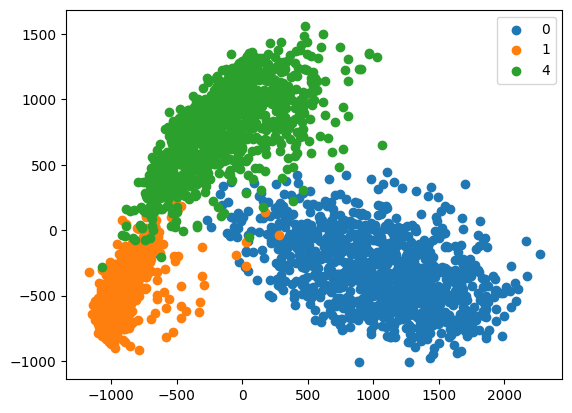

In [23]:
# We select 100 images each for digit 0, 1, 4 (these digits are easily separable from PCA plot)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
n_pts_per_class = 1000
selected_class = [0, 1, 4]
x = np.concatenate([x_train[np.where(y_train == c)[0][:n_pts_per_class]]
                    for c in selected_class], axis=0)
# The true labels for the selected 300 images
y = np.repeat(selected_class, n_pts_per_class)
x = x.reshape(len(y), -1)

# Since x.shape = (300, 784), it is hard to visualize a 784 vector; we use PCA to reduce 784-dimentional to 2-D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pc = pca.fit_transform(x)
for c in selected_class:
  plt.scatter(x_pc[y==c, 0], x_pc[y==c, 1], label=c)
plt.legend()
plt.show()

# Run KMeans a few times to cluster these digits and observe the results

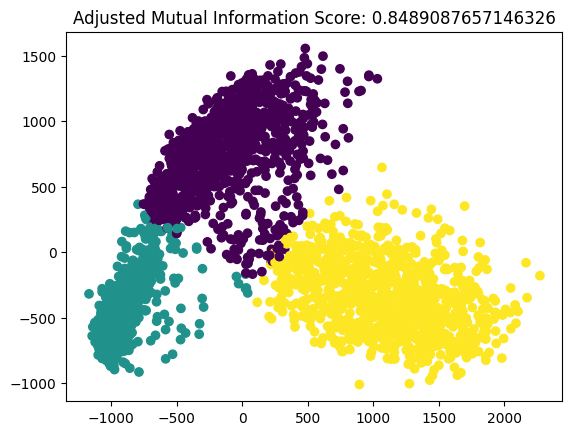

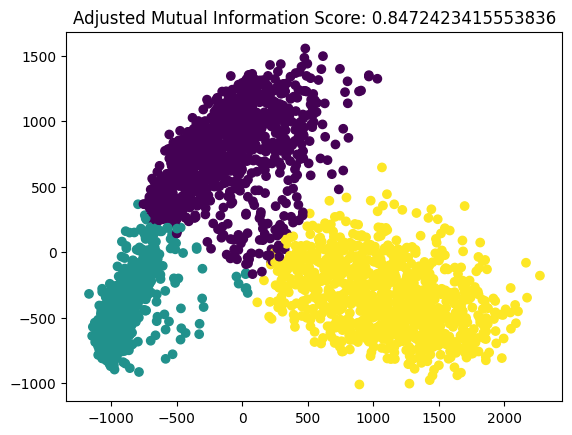

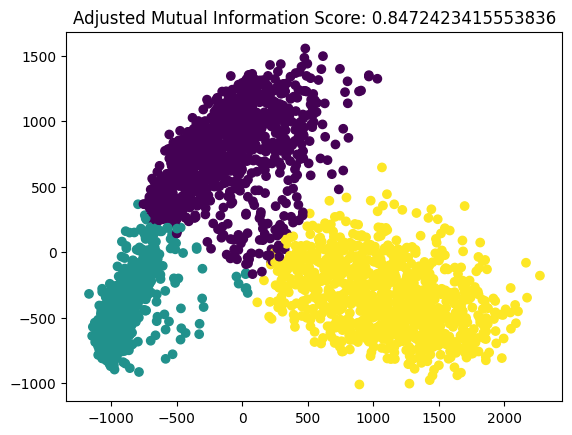

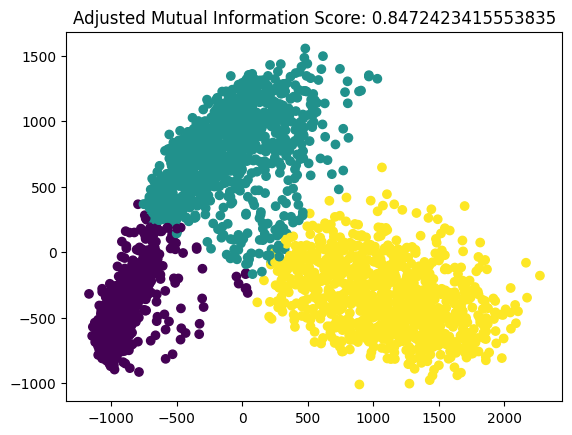

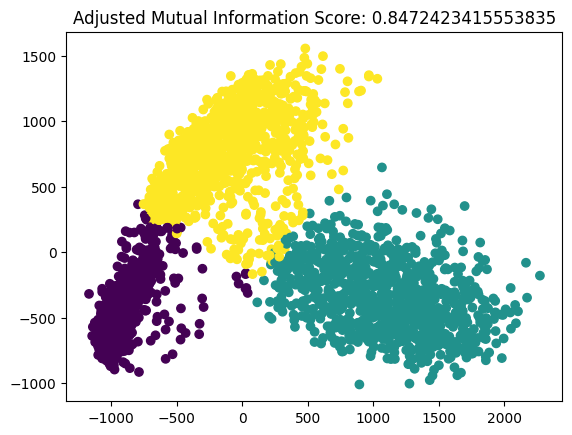

In [32]:
from sklearn.metrics import adjusted_mutual_info_score
num_runs = 5
adj_mi_list = []
for _ in range(num_runs):
  # This is where you call KMeans to get the clustering result
  labels = KMeans(x, n_clusters=3)
  # Since we know the ground truth labels, we can measure how good our clustering result is.
  adj_mi = adjusted_mutual_info_score(labels_true=y, labels_pred=labels)
  adj_mi_list.append(adj_mi)
  plt.scatter(x_pc[:, 0], x_pc[:, 1], c=labels)
  plt.title(f'Adjusted Mutual Information Score: {adj_mi}')
  plt.show()

In [ ]:
print(adj_mi_list)

[]


## Pause and think: why does KMeans return different results each run?

Test .....